In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas_profiling
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
pandas_profiling.ProfileReport(train)

In [4]:
pandas_profiling.ProfileReport(test)

### pHの欠損値を線形回帰で補完

In [5]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
X=train[~train['pH'].isnull()].loc[:,['fixed_acidity']].values
y=train[~train['pH'].isnull()].loc[:,['pH']].values

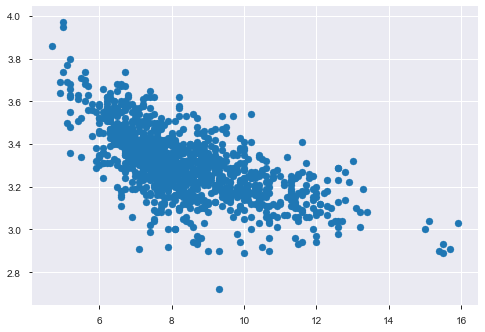

In [7]:
plt.scatter(X,y)

In [8]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

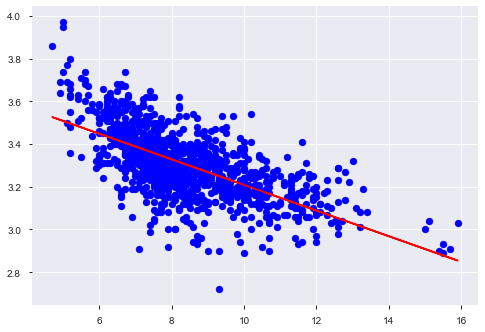

In [9]:
plt.scatter(X,y,color='blue')
plt.plot(X, lr.predict(X), color = 'red')

plt.grid(True)

plt.show()         

In [10]:
_X=train[train['pH'].isnull()].loc[:,['fixed_acidity']].values

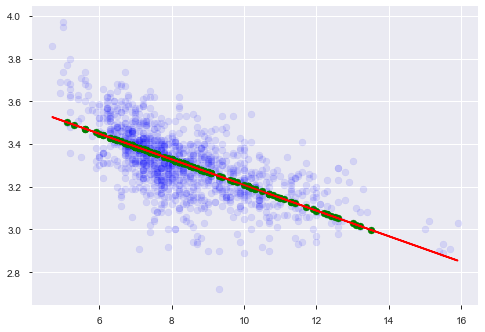

In [11]:
plt.scatter(X,y,color='blue', alpha=0.1)
plt.plot(X, lr.predict(X), color = 'red')
plt.scatter(_X, lr.predict(_X), color = 'green')

plt.grid(True)

plt.show()    

### trainとtestを結合して学習

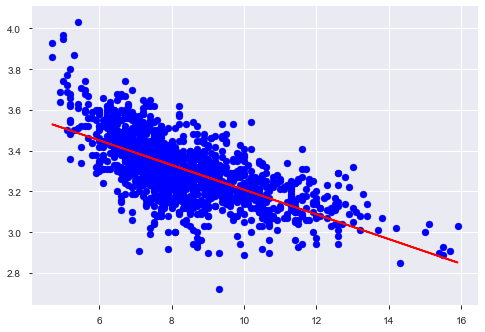

In [12]:
_df =pd.concat([train,test],axis=0)
X=_df[~_df['pH'].isnull()].loc[:,['fixed_acidity']].values
y=_df[~_df['pH'].isnull()].loc[:,['pH']].values

lr = LinearRegression()
lr.fit(X,y)

plt.scatter(X,y,color='blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.grid(True)
plt.show()   

In [13]:
train.shape

(1280, 12)

In [14]:
for df in [train,test]:
    print(df.shape)
    _X=df[df['pH'].isnull()].loc[:,['fixed_acidity']].values
    df.loc[df[df['pH'].isnull()].index,['pH']] = lr.predict(_X)

(1280, 12)
(319, 11)


In [15]:
print(train['pH'].isnull().sum())
print(test['pH'].isnull().sum())

0
0


In [21]:
train.isna().sum()

fixed_acidity             0
volatile_acidity          0
citric_acid               0
residual_sugar            0
chlorides                 0
free_sulfur_dioxide       0
total_sulfur_dioxide      0
density                 122
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [22]:
test.isna().sum()

fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                 25
pH                       0
sulphates                0
alcohol                  0
dtype: int64

In [23]:
train.to_csv('./pH_comp/train.csv',index=False)
test.to_csv('./pH_comp/test.csv',index=False)

### critic acid == 0　を置換する

0valueが多い → 仮説「0で穴埋めされた」

(array([2.81734852, 1.46819571, 1.42851474, 1.66660053, 1.5872386 ,
        1.42851474, 1.19042895, 0.51585255, 0.27776676, 0.27776676]),
 array([0.   , 0.079, 0.158, 0.237, 0.316, 0.395, 0.474, 0.553, 0.632,
        0.711, 0.79 ]),
 <a list of 10 Patch objects>)

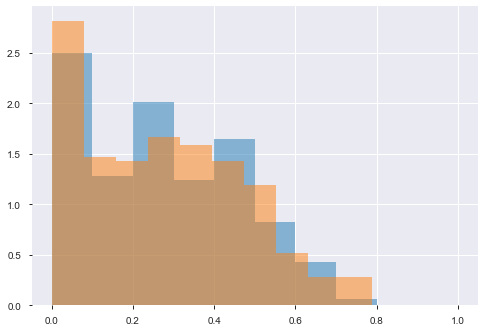

In [24]:
plt.hist(train['citric_acid'],normed=True,alpha=0.5)
plt.hist(test['citric_acid'],normed=True,alpha=0.5)

Text(0.5, 1.0, 'volatile acidity VS citric acid(ALL)')

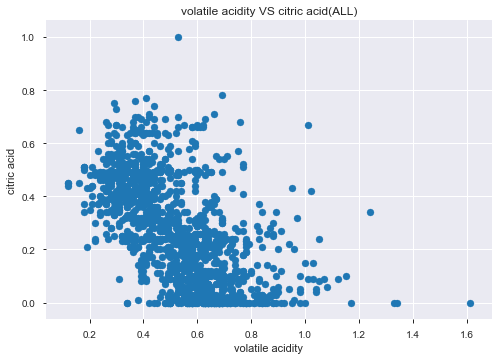

In [25]:
plt.scatter(train['volatile_acidity'],train['citric_acid'])
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.title('volatile acidity VS citric acid(ALL)')

Text(0.5, 1.0, 'volatile acidity VS citric acid(>0)')

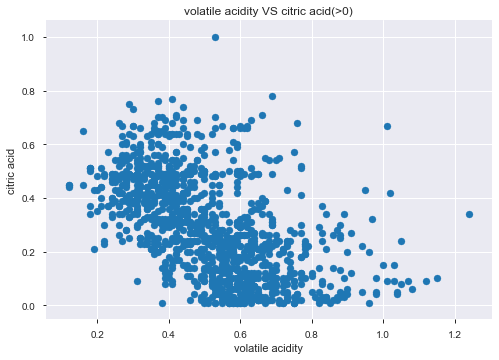

In [26]:
plt.scatter(train[train['citric_acid']>0]['volatile_acidity'],train[train['citric_acid']>0]['citric_acid'])
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.title('volatile acidity VS citric acid(>0)')

Text(0.5, 1.0, 'fixed acidity acidity VS citric acid(ALL)')

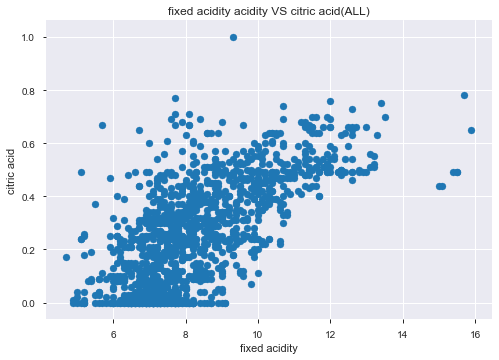

In [27]:
plt.scatter(train['fixed_acidity'],train['citric_acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.title('fixed acidity acidity VS citric acid(ALL)')

Text(0.5, 1.0, 'fixed acidity VS citric acid(>0)')

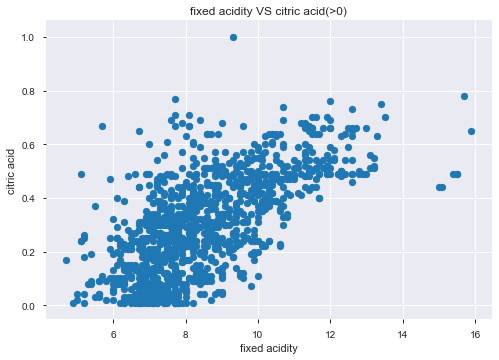

In [28]:
plt.scatter(train[train['citric_acid']>0]['fixed_acidity'],train[train['citric_acid']>0]['citric_acid'])
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.title('fixed acidity VS citric acid(>0)')

#### fixed acidityとvolatile acidityからcitric acid(=0)の真の値を予測&補完

In [29]:
X=_df[_df['citric_acid']!=0].loc[:,['fixed_acidity','volatile_acidity']].values
y=_df[_df['citric_acid']!=0].loc[:,['citric_acid']].values

In [30]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
_X = _df[_df['citric_acid']==0].loc[:,['fixed_acidity','volatile_acidity']].values
_y = lr.predict(_X)

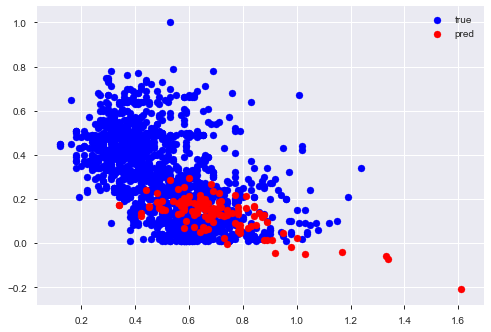

In [32]:
plt.scatter(_df[_df['citric_acid']!=0]['volatile_acidity'],_df[_df['citric_acid']>0]['citric_acid'],color='blue',label='true')
plt.scatter(_df[_df['citric_acid']==0]['volatile_acidity'],_y,color='red',label='pred')
plt.legend()
plt.grid(True)

plt.show()

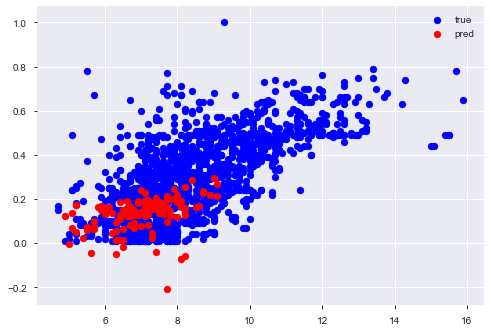

In [33]:
plt.scatter(_df[_df['citric_acid']!=0]['fixed_acidity'],_df[_df['citric_acid']>0]['citric_acid'],color='blue',label='true')
plt.scatter(_df[_df['citric_acid']==0]['fixed_acidity'],_y,color='red',label='pred')
plt.legend()
plt.grid(True)

plt.show()

0だったcitric acidがそれっぽく散った。

予測値がマイナスになった値は0に置換する。

In [34]:
for df in [train,test]:
    _X=df[df['citric_acid']==0].loc[:,['fixed_acidity','volatile_acidity']].values
    df.loc[df[df['citric_acid']==0].index,['citric_acid']] = lr.predict(_X)
    df.loc[df[df['citric_acid']<0].index,['citric_acid']] = 0.0

In [38]:
train.to_csv('./pH_critic_comp/train.csv',index=False)
test.to_csv('./pH_critic_comp/test.csv',index=False)

### densityの観察

Text(0, 0.5, 'fixed_acidity')

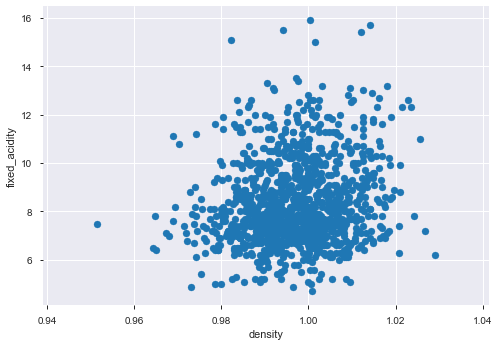

In [40]:
plt.scatter(train.loc[:,['density']].values, train.loc[:,['fixed_acidity']].values)
plt.xlabel('density')
plt.ylabel('fixed_acidity')

(array([ 1.18721136,  4.15523976, 13.65293063, 23.74422718, 35.0227351 ,
        39.17797485, 26.1186499 , 18.99538175, 10.68490223,  1.78081704]),
 array([0.9658 , 0.97153, 0.97726, 0.98299, 0.98872, 0.99445, 1.00018,
        1.00591, 1.01164, 1.01737, 1.0231 ]),
 <a list of 10 Patch objects>)

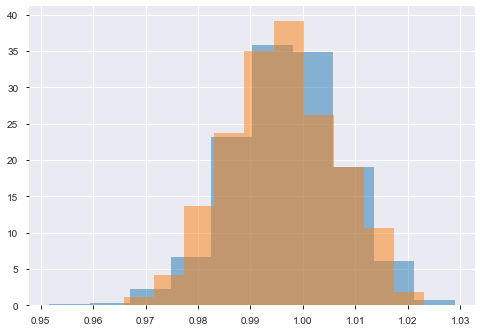

In [93]:
plt.hist(train.loc[:,['density']].values,normed=True,alpha=0.5)
plt.hist(test.loc[:,['density']].values,normed=True,alpha=0.5)

### pairplot

In [106]:
_train = train.drop(['quality'],axis=1).copy()
_train['label']='train'
_train.fillna(0,inplace=True)
_test = test.copy()
_test['label']='test'
_test.fillna(0,inplace=True)
df = pd.concat([_train,_test],axis=0)

In [102]:
df.shape

(1599, 12)

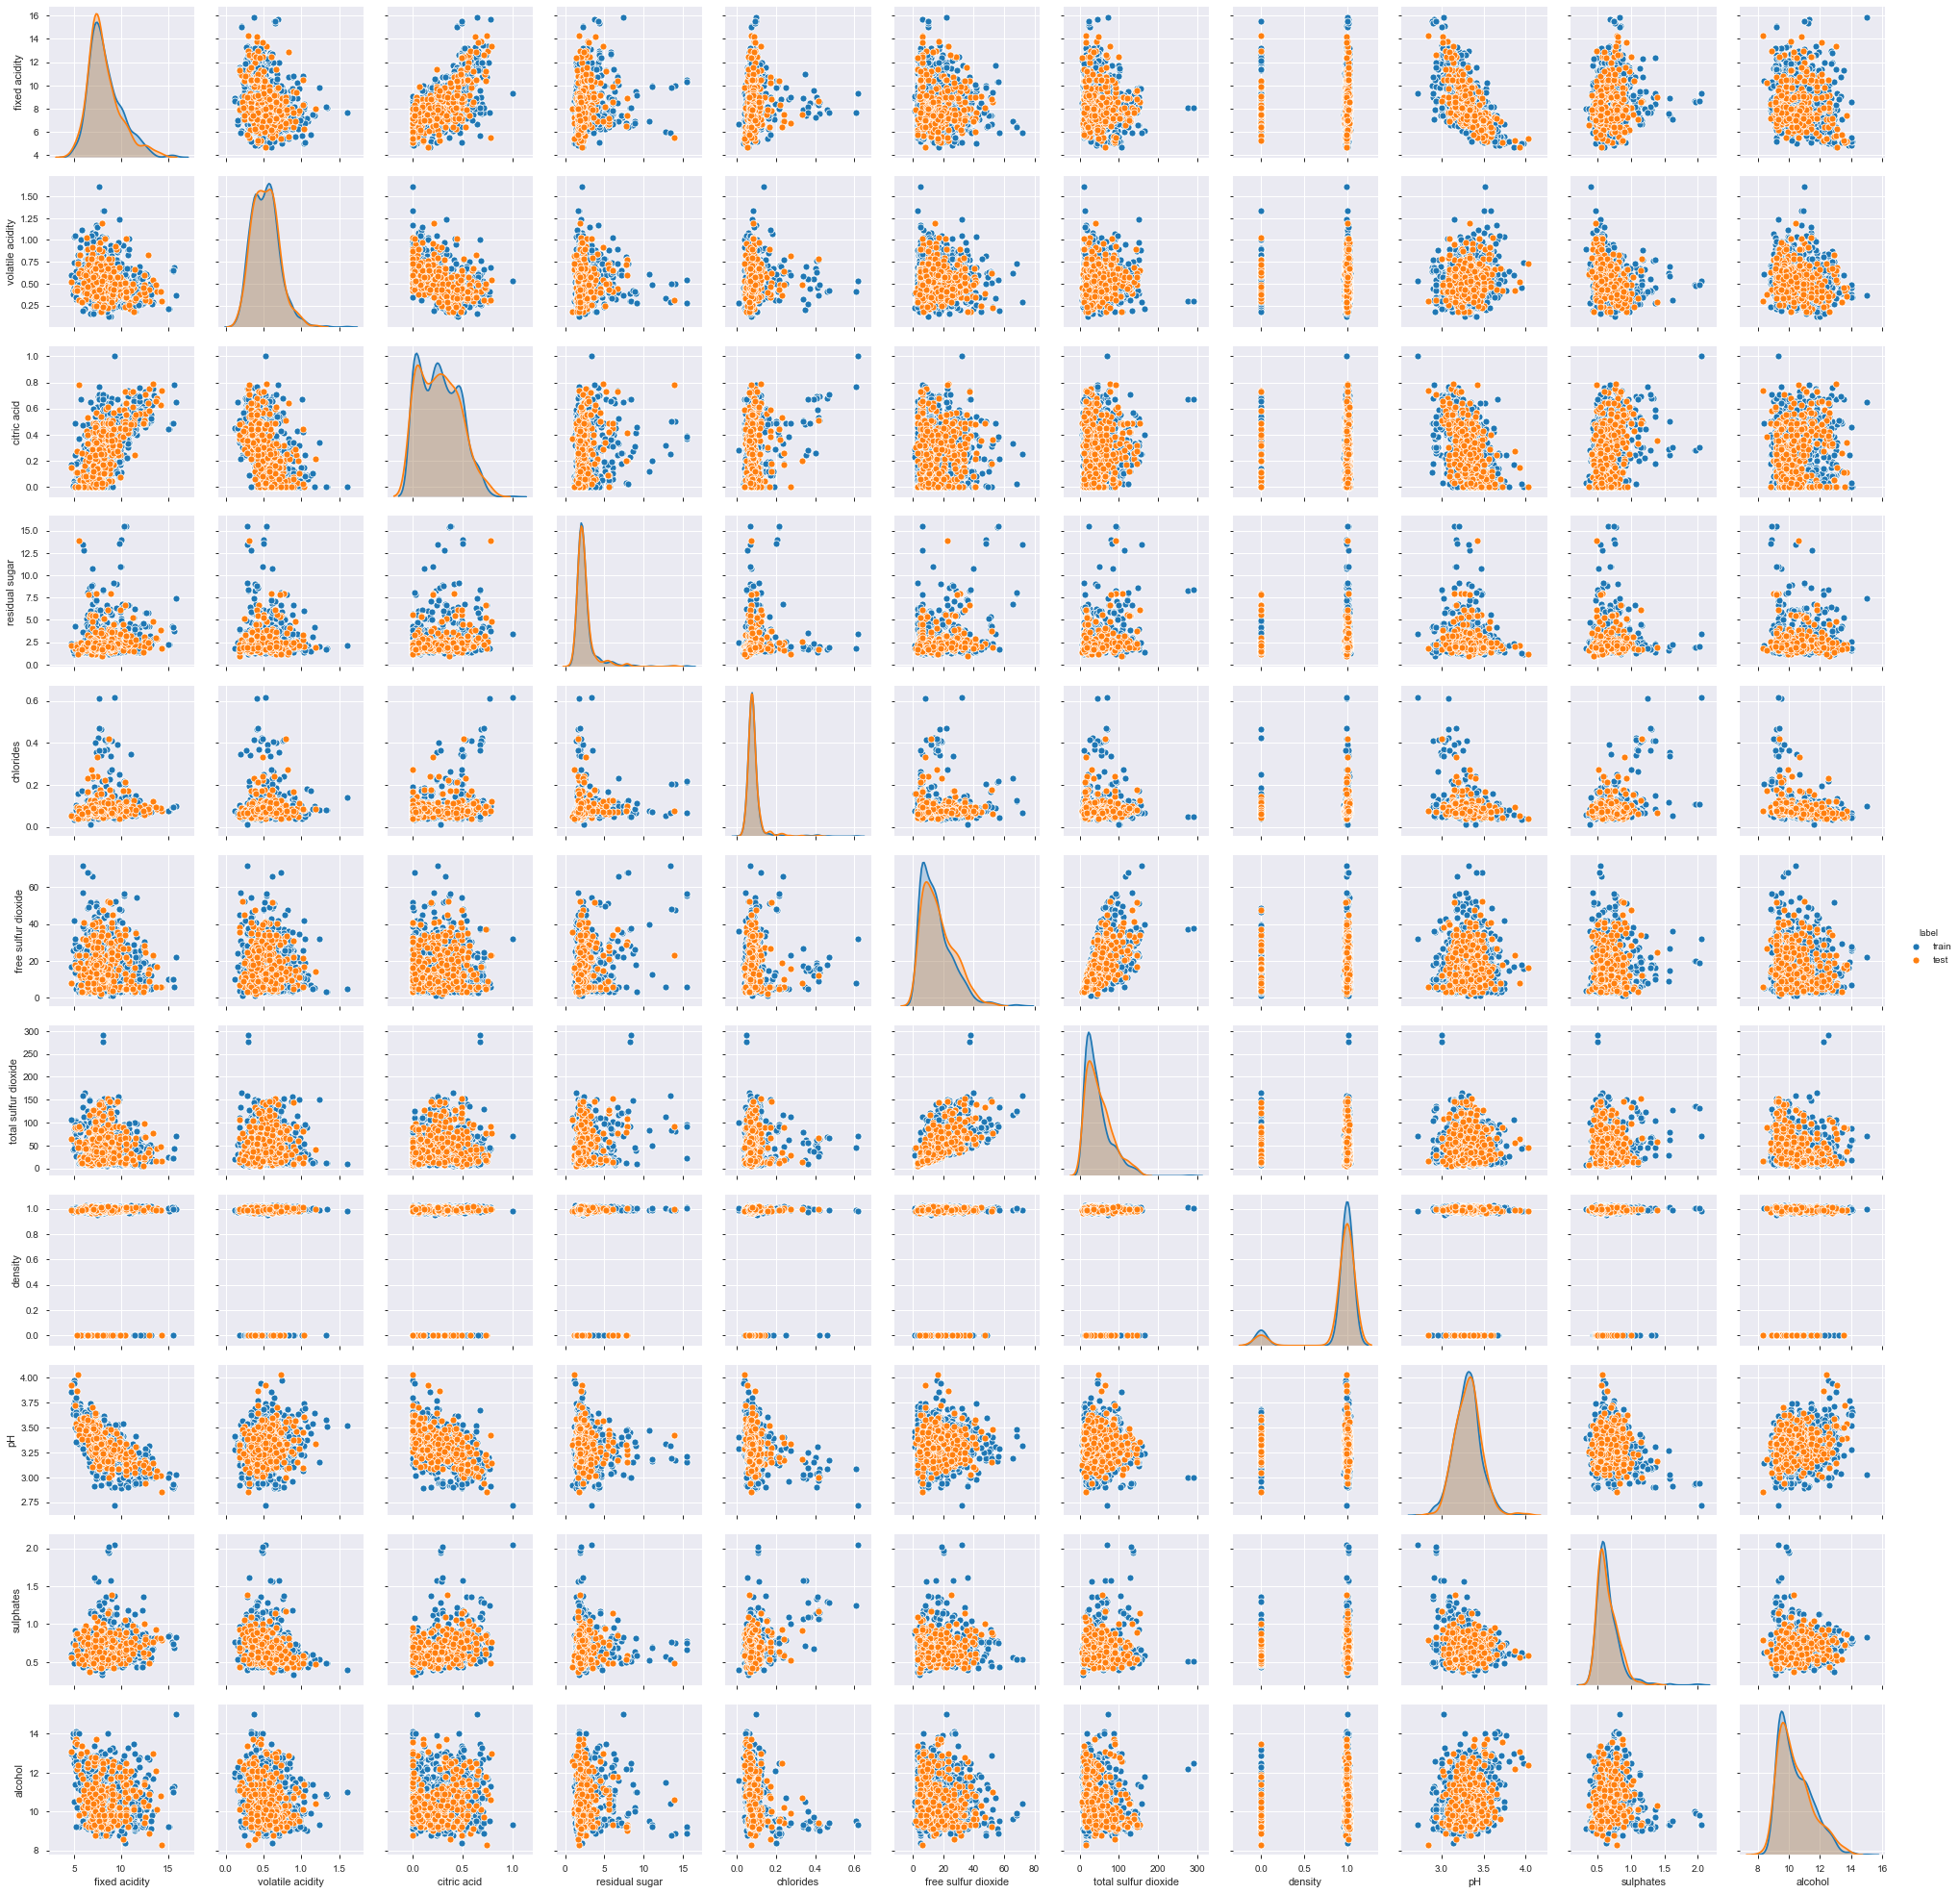

In [107]:
sns.pairplot(df, hue="label", size=2.5)